##### What is Linear Regression?
 
Linear regression is a predictive analysis that predicts the value on a dependent variable based on an independent variable or multiple independent variables. 

The predictive analysis where the dependent variable is predicted from one independent variable is Simple linear regression, and when multiple independent variable are used the it is called 'Multiple linear regression'.


##### How does it work?

By using best fit straight line linear regression sets up a relationship between dependent variable (Y) and one or more independent variables (X). In other words, there exist a linear relationship between independent and dependent variables.

##### Simple linear regression 

This analysis predicts the value of dependent variable (Y) by using the line of best fit, which can be defined by the 
equation :

i. E(y) = $\beta_0$ + $\beta_1$x ------- (i)

where:
- E(y) is the mean or expected value of y for a given value of x. 
- ${\beta_0}$ is the y- of the lines of best fit, 
- $\beta_1$ is the slope of the line 
      
$\beta_1$ can be calculated using personsr, standard deviation of y(s$_y$) and standard deviation of x(s$_x$).

ii. $\beta_1$ = pearsonsr(s$_y$/s$_x$) ----------(ii)

The values for $\beta_0$ can be calculated by taking the mean of x ($\bar{x}$) and mean of y($\bar{y}$). We know that the line of best fit or regression line would intercept through these two points - ($\bar{x}$) and ($\bar{y}$)

Then, we can put these values in the above equation (i), to get 

iii. ${\beta_0}$ = ($\bar{y}$) - $\beta_1$($\bar{x}$) ----------- (iii)

Once the values of $\beta_0$ and $\beta_1$ have been calculated. We can plug in the values in equation (i) to get the predicted value for y for a given x.

Looking at an example using the simple linear regression predictive model:

  

In [11]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats.stats import pearsonr


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Getting the required dataset to test our model.

In [5]:
# Downloading the data
data = "https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/Original_2000_2014_Fuel_Consumption_Ratings.csv"
df = pd.read_csv(data)

In [7]:
# Check to see missing data
df.isna().any()

MODEL_YEAR                        False
MAKE                              False
MODEL                             False
VEHICLE_CLASS                     False
ENGINE_SIZE(L)                    False
CYLINDERS                         False
TRANSMISSION                      False
FUEL_TYPE                         False
FUEL_CONSUMPTION_CITY(L/100km)    False
HWY_(L/100km)                     False
COMB_(L/100km)                    False
COMB_(mpg)                        False
CO2_EMISSIONS(g/km)               False
dtype: bool

Here we can observe no data is missing from any of our columns. Therefore, we need not worry about missing data in this case.

In [ ]:
# Shape of data
df.shape

We observe that the dataset has 14343 rows and 13 column variables.

Before we get underway with predictive modeling we want to see if there is any relationship between our dependent variable(y) and the independent variable(x). 

In this case, our dependent variable in CO2 emissions, and our independent variable is Engine Size. Therefore, we want to identify if there is any coorelation between the two with a scatter plot.


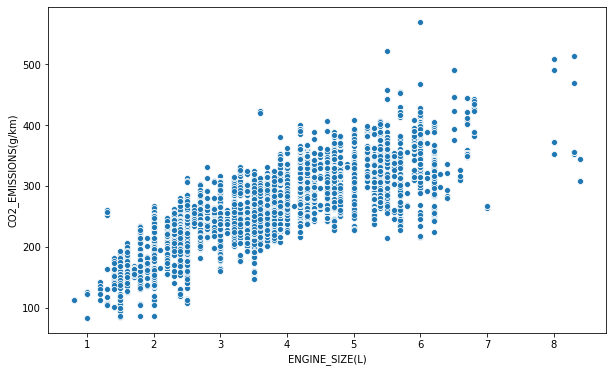

In [9]:
plt.figure(figsize=(10,6))
co2_enginesize = sns.scatterplot(df['ENGINE_SIZE(L)'], df['CO2_EMISSIONS(g/km)'])

From we scatterplot we do get an idea that as the Engine size increases the C02 emission increase as well. Let us now find the correlation value between the two using personsr.

In [14]:
# using the pearsonsr library
cor_co2_engine, pval = pearsonr(df['ENGINE_SIZE(L)'], df['CO2_EMISSIONS(g/km)'])
print(round(cor_co2_engine,2))

0.83


The correlation between the two can be seen at 0.83.

Now, we try to identify the equation for line of best fit so that we can determine what the predicted value of y will be for a given x.

In [16]:
# mean of Engine_size and CO2_Emission
mean_engine = np.mean(df['ENGINE_SIZE(L)'])
mean_co2 = np.mean(df['CO2_EMISSIONS(g/km)'])
# Standard deviation for Engine_size and C02_Emission
std_engine = np.std(df['ENGINE_SIZE(L)'], ddof = 1)
std_co2 = np.std(df['CO2_EMISSIONS(g/km)'], ddof = 1)

With these values calculated we can find intercept ($\beta_0$) and slope($\beta_1$) using
$\beta_1$ = pearsonsr(s$_y$/s$_x$)
and 
${\beta_0}$ = ($\bar{y}$) - $\beta_1$($\bar{x}$) 




In [19]:
slp = cor_co2_engine * (std_co2/std_engine)
intercept = mean_co2 - (slp *mean_engine)

In [23]:
print(f"The slope of regression line is:{round(slp,2)}")
print(f"The y-intercept is:{round(intercept,2)}")
print(f"The regression line equation is E(y)= {round(intercept,2)}+ {round(slp,2)}x " )

The slope of regression line is:37.28
The y-intercept is:119.01
The regression line equation is E(y)= 119.01+ 37.28x 


Therefore, we can get the equation that allows us to predict a value of y for a given x. In our case, the predicted amount of C02(g/Kg) based on the engine size.

We can say for each unit change in engine size, the CO-2 emission increases by 
- E(y)= 119.01+ 37.28(engine_size)

Comparing this equation to the sckit learn's regression library. 

In [65]:
#Splitting the dataset into training and test datasets
X = df[['ENGINE_SIZE(L)']]
y = df['CO2_EMISSIONS(g/km)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, shuffle = True)



In [66]:
# fitting the training data in the regessor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
# the slope and intercept as given by the regression model
regressor_slope = regressor.coef_
regressor_intercept = regressor.intercept_
accuracy = regressor.score(X_test, y_test)

In [80]:
print(f"The slope of regression line is:{round(regressor_slope[0],2)}")
print(f"The y-intercept is:{round(regressor_intercept,2)}")
print(f"The regression line equation is E(y)= {round(regressor_intercept,2)}+ {round(regressor_slope[0],2)}(Engine_size) " )
print('Accuracy: ', (accuracy))

The slope of regression line is:37.25
The y-intercept is:119.06
The regression line equation is E(y)= 119.06+ 37.25(Engine_size) 
Accuracy:  0.6907725869652954


We can see that the manually calculated model and using the scikit learn library linear regression model tend to produce the same result. We can also evaluate the score for our model which in this case is 0.69.

Text(2, 500, '119.06+ 37.25(Engine_size)')

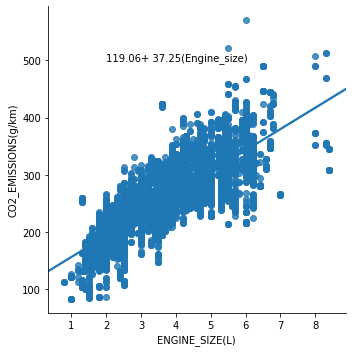

In [84]:
# plotting the regression line 
sns.lmplot('ENGINE_SIZE(L)', 'CO2_EMISSIONS(g/km)', data = df)
plt.text(2, 500, f"{round(regressor_intercept,2)}+ {round(regressor_slope[0],2)}(Engine_size)")